In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import json
from pandas.io.json import json_normalize
from functools import reduce
from PIL import Image

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv('./BrewsterShots.csv')

In [20]:
df.Goal.value_counts()

0.0    34
1.0    11
Name: Goal, dtype: int64

In [25]:
df.head()

,id,playerId,teamId,matchId,matchPeriod,eventSec,eventId,subEventId,StartX,StartY,EndX,EndY,accurate,recipientId,carryStartX,carryStartY,isCarry,carryStart,carryEnd,carryId,carryXGain,Position,Formation,lost,not_accurate,won,Right,blocked,interception,high,neutral,take_on_r,take_on_l,sliding_tackle,yellow_card,keypass,free_space_l,free_space_r,Left,counter_attack,anticipation,anticipated,Goal,opportunity,gr,through,or,olb,direct,glb,gtl,head_body,ot,missed_ball,assist,gt,gl,gc,gb,red_card,otr,otl,eventOrder,Feint,gbr,obr,dangerous_ball_lost,gtr,pbr,ol,pl,fairplay,pt,plb,ptr,ptl,second_yellow_card,own_goal,indirect,pr,seasonId,leagueId,recipientPosition,id.1,xG,seasonId.1
0,455229203,448597,10531,2830859,2,163.608863,10,100,71,79,100,100,0,0,0,0,0,0,0,-1,0,cf,4-2-3-1,0,1,0,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,NaN,1,0.0,0,0.0,0.0,0.0,NaN,NaN,0,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,827,NaN,0.0,0.0,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,185728,346,0,455229203.0,0.034191,185728.0
1,455229527,448597,10531,2830859,2,995.227574,10,100,82,52,100,100,0,0,81,56,0,0,1,90,1,cf,4-2-3-1,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0.0,0,0,NaN,0,0.0,0,0.0,0.0,0.0,NaN,NaN,0,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,1087,NaN,0.0,1.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,185728,346,0,455229527.0,0.001775,185728.0
2,455229676,448597,10531,2830859,2,1366.535265,10,100,82,63,100,100,0,0,0,0,0,0,0,-1,0,cf,4-2-3-1,0,1,0,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,NaN,1,0.0,0,0.0,1.0,0.0,NaN,NaN,0,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,1216,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,185728,346,0,455229676.0,0.044956,185728.0
3,460634084,448597,10531,2830900,2,883.208015,10,100,91,56,100,100,0,0,0,0,0,0,0,-1,0,cf,4-3-3,0,1,0,1,1,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0.0,0,0.0,0,NaN,0.0,0.0,0.0,NaN,0,0.0,0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1120,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,185728,346,0,460634084.0,0.011287,185728.0
4,460634097,448597,10531,2830900,2,949.599451,10,100,92,74,100,100,1,0,86,72,0,0,1,120,6,cf,4-3-3,0,0,0,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0.0,1,0.0,0,NaN,0.0,0.0,0.0,NaN,0,0.0,0,0.0,NaN,NaN,0.0,1.0,NaN,0.0,0.0,1143,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,185728,346,0,460634097.0,0.131969,185728.0


In [64]:
# mask=df["situation"]=='Penalty'
# df.loc[mask]

In [26]:
# # Remove penalties from the data
# df = df[df['situation'] != 'Penalty']

In [27]:
# def clean_goal_results(x):
#     situation = x[1]
#     result = x[0]
#     if situation == 'Penalty':
#         return 'P'
#     if result == 'Goal':
#         return 'G'
#     return 'M'

In [28]:
# df['color_key'] = df[['result', 'situation']].apply(clean_goal_results, axis=1)

In [30]:
# df.color_key.value_counts()
# # 

In [31]:
# df[["X", "Y", "xG"]] = df[["X", "Y", "xG"]].apply(pd.to_numeric)

In [32]:
def draw_pitch(pitch, line, orientation, view):
     
    orientation = orientation
    view = view
    line = line
    pitch = pitch
     
    if orientation.lower().startswith("h"):
         
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(49,105)
            plt.ylim(-1,69)
        elif view.lower().startswith("t"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(69,105)
            plt.ylim(-1,69)
            # final third line
            lxt = [0,68] 
            lyt = [69,69]
            plt.plot(lxt,lyt,color=line,linestyle='--',zorder=5)
        else:
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.xlim(-1,105)
            plt.ylim(-1,69)
        ax.axis('off') # this hides the x and y ticks
     
        # side and goal lines #
        ly1 = [0,0,68,68,0]
        lx1 = [0,104,104,0,0]
 
        plt.plot(lx1,ly1,color=line,zorder=5)
 
 
        # boxes, 6 yard box and goals
 
            #outer boxes#
        ly2 = [13.84,13.84,54.16,54.16] 
        lx2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)
 
        ly3 = [13.84,13.84,54.16,54.16] 
        lx3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)
 
            #goals#
        ly4 = [30.34,30.34,37.66,37.66]
        lx4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)
 
        ly5 = [30.34,30.34,37.66,37.66]
        lx5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)
 
 
           #6 yard boxes#
        ly6 = [24.84,24.84,43.16,43.16]
        lx6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)
 
        ly7 = [24.84,24.84,43.16,43.16]
        lx7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)
 
        #Halfway line, penalty spots, and kickoff spot
        ly8 = [0,68] 
        lx8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)
 
 
        plt.scatter(93,34,color=line,zorder=5)
        plt.scatter(11,34,color=line,zorder=5)
        plt.scatter(52,34,color=line,zorder=5)
 
        circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)
 
        ## Rectangles in boxes
        rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color=pitch, zorder=1,alpha=1)
 
        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 106,70,ls='-',color=pitch, zorder=1,alpha=1)
 
        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
         
    else:
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(49,105)
            plt.xlim(-1,69)
        elif view.lower().startswith("t"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(69,105)
            plt.xlim(-1,69)
            # final third line
            lxt = [0,68] 
            lyt = [69,69]
            plt.plot(lxt,lyt,color=line,linestyle='--',zorder=5)
        else:
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.ylim(-1,105)
            plt.xlim(-1,69)
        ax.axis('off') # this hides the x and y ticks
 
        # side and goal lines #
        lx1 = [0,0,68,68,0]
        ly1 = [0,104,104,0,0]
 
        plt.plot(lx1,ly1,color=line,zorder=5)
 
 
        # boxes, 6 yard box and goals
 
            #outer boxes#
        lx2 = [13.84,13.84,54.16,54.16] 
        ly2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)
 
        lx3 = [13.84,13.84,54.16,54.16] 
        ly3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)
 
            #goals#
        lx4 = [30.34,30.34,37.66,37.66]
        ly4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)
 
        lx5 = [30.34,30.34,37.66,37.66]
        ly5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)
 
 
           #6 yard boxes#
        lx6 = [24.84,24.84,43.16,43.16]
        ly6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)
 
        lx7 = [24.84,24.84,43.16,43.16]
        ly7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)
 
        #Halfway line, penalty spots, and kickoff spot
        lx8 = [0,68] 
        ly8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)
 
 
        plt.scatter(34,93,color=line,zorder=5)
        plt.scatter(34,11,color=line,zorder=5)
        plt.scatter(34,52,color=line,zorder=5)
 
        circle1 = plt.Circle((34,93.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((34,10.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((34,52), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)
 
 
        ## Rectangles in boxes
        rec1 = plt.Rectangle((20, 87.5), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((20, 0), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
 
        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 70,106,ls='-',color=pitch, zorder=1,alpha=1)
 
        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        return

In [33]:
# (len(str(df.shotType)))

In [73]:
df['x_loc_m'] = df['X'] * 105.2
df['y_loc_m'] = df['Y'] * 68

In [74]:
df['date'] =  pd.to_datetime(df['date'])

In [75]:
mask = df['date'] > ('2016-05-25 14:30:00')
df = df[mask]

In [92]:
def xg_plot(df, pitch ='#3c4766', line ='white'):
    
    csfont = {'fontname':'BBC Reith Sans'}
    hfont = {'fontname':'BBC Reith Sans'}

    draw_pitch(pitch, line, orientation='vertical', view='third')
    df['y_loc_m'] = [68 - i for i in df['y_loc_m']] # Note y axis is flipped for vertical pitch view
    df['xG_s'] = [400 * i for i in df['xG']] # Scale xG values for plotting
    
    plt.figimage(img, 734, 554, alpha=.9, zorder=1)

    colors_1 = {'G':'lightblue', 'M':'orange'}
    
    zo = 12 # This is to ensure everything is plotted above the pitch elements

    # Plot shots
    plt.scatter(df['y_loc_m'], df['x_loc_m'], c=df['color_key'].apply(lambda x: colors_1[x]), s=df['xG_s'], zorder=zo, alpha=0.7)
    
    # Add legend to explain that marker size = xG
    mSize = [0.05,0.10,0.2,0.4,0.6,1] 
    mSizeS = [400 * i for i in mSize]
    mx = [1.5,2.8,4.4,6.4,8.7,11.5]
    my = [70.5,70.5,70.5,70.5,70.5,70.5]
    plt.scatter(mx, my, s=mSizeS, zorder=zo, color='#e5e5e7', alpha=0.5)
    i = 0
    for i in range(len(mx)):
        plt.text(mx[i], my[i], mSize[i], fontsize=mSize[i]*18, color=line, zorder=zo, ha='center', va='center', **csfont, fontweight="bold")
    
    
    # Add goal scored legend
    y = [72.7]
    z = [2]
    n = ['Shot']
    y1 = [72.7]
    z1 = [8]
    n1 = ['Goal']
    plt.scatter(z,y, s=200, zorder=zo, color='orange', alpha=0.8,linewidth=1.5)
    plt.plot([30], [73.5], color=line, lw=0.7, zorder=zo)
    for i, txt in enumerate(n):
        plt.annotate(txt, (z[i]+1.5, y[i]-0.4),fontsize=11, **csfont, color=line)
    plt.scatter(z1,y1, s=200, zorder=zo, color='lightblue', alpha=0.8,linewidth=1.5)
    plt.plot([30], [72.5], color=line, lw=0.7, zorder=zo)
    for i, txt in enumerate(n1):
        plt.annotate(txt, (z1[i]+1.5, y1[i]-0.4),fontsize=11, **csfont, color=line)

    # Add legend to show team/player info
    xg_sum = str(round(np.sum(df['xG']), 2))
    goal_sum = str(np.sum(df['goal']))
    shot_sum = str(len(df.shotType))
    legend_string = 'Goals: \n'+ 'xG: \n'+ 'Shots: '
    legend_string_num = goal_sum +'\n'+ xg_sum +'\n'+shot_sum
    plt.text(57.5, 72.5, legend_string, color=line, ha='left', va='center', zorder=zo, fontsize=14, **csfont)
    plt.text(67.1, 72.5, legend_string_num, color=line, ha='right', va='center', zorder=zo, fontsize=14, **csfont)
    plt.text(67.3, 69.8, 'penalties removed', color=line, ha='right', va='center', zorder=zo, fontsize=9,style='italic')
    
    # Title
    plt.text(0,108, "Granit Xhaka", color=line, zorder=zo, fontsize=22, fontweight='bold', **csfont)
    subtitle_string = 'Arsenal | English Premier League | 2016/17 - 2019/20'
    plt.text(0, 106, subtitle_string, fontsize=14,**csfont, color=line)
    
    # Show Twitter info below
    info_string = 'data: understat'
    plt.text(0, 66.5, info_string, color=line, ha='left', va='bottom', zorder=zo, fontsize=15, **csfont)
    info_string = '@jonollington'
    plt.text(56, 66.5, info_string, color=line, ha='left', va='bottom', zorder=zo, fontsize=15, **csfont)
    
    plt.rcParams['axes.facecolor']='#3c4766'
    plt.rcParams['savefig.facecolor']='#3c4766'
    
    
    return;

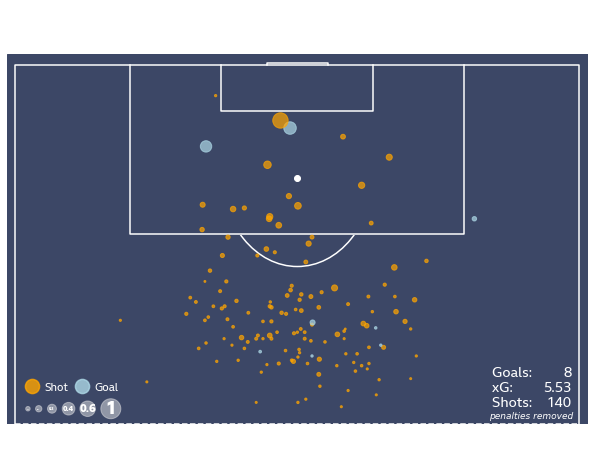

In [93]:
xg_plot(df)
plt.savefig("xhaka 19",bbox_inches="tight",dpi=100)

In [90]:
img = Image.open('./arsenal.png')
img.size

(411, 481)

In [91]:
img = img.resize((62, 72), Image.ANTIALIAS)